


          
# Johansen Cointegration Test Formula

The Johansen cointegration test is a statistical procedure for testing cointegration among multiple time series. Here's the mathematical formula and explanation of how it works:

## Basic Model

The Johansen test is based on a Vector Error Correction Model (VECM):

$$\Delta Y_t = \Pi Y_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta Y_{t-i} + \mu + \varepsilon_t$$

Where:
- $Y_t$ is a $k \times 1$ vector of time series variables
- $\Pi$ is a $k \times k$ matrix whose rank determines the number of cointegrating relationships
- $\Gamma_i$ are $k \times k$ coefficient matrices
- $\mu$ is a deterministic term (constant, trend)
- $\varepsilon_t$ is a vector of innovations

## Key Components of the Test

The critical part of the Johansen test involves examining the rank of the $\Pi$ matrix:

1. If rank($\Pi$) = 0: No cointegration exists
2. If rank($\Pi$) = k: All series are stationary
3. If 0 < rank($\Pi$) < k: There are rank($\Pi$) cointegrating relationships

## Test Statistics

The Johansen test uses two test statistics:

### 1. Trace Test

$$\lambda_{trace}(r) = -T \sum_{i=r+1}^{k} \ln(1-\hat{\lambda}_i)$$

Tests the null hypothesis that there are at most $r$ cointegrating vectors.

### 2. Maximum Eigenvalue Test

$$\lambda_{max}(r,r+1) = -T \ln(1-\hat{\lambda}_{r+1})$$

Tests the null hypothesis that there are exactly $r$ cointegrating vectors against the alternative that there are $r+1$.

Where:
- $T$ is the sample size
- $\hat{\lambda}_i$ are the estimated eigenvalues of the $\Pi$ matrix (ordered from largest to smallest)

## Critical Values

The critical values used in your code are derived from asymptotic distributions that depend on:
- The number of variables ($k$)
- The deterministic specification (constant, trend, etc.)
- The significance level

These critical values are pre-calculated through Monte Carlo simulations and are accessed in your code through:

```python
# Critical values for trace test
trace_crit_vals = result.cvt

# Critical values for max eigenvalue test
max_eig_crit_vals = result.cvm
```

## Interpretation

In your code, you're comparing the test statistics with critical values:

```python
# Determine cointegration rank using trace test
trace_rank = 0
for i in range(n):
    if trace_stats[i] > trace_crit_vals[i, 0]:  # 0 index is for 90% significance
        trace_rank = i + 1
```

If the test statistic exceeds the critical value, you reject the null hypothesis and conclude that there are more cointegrating relationships than stated in the null.

The final cointegration rank tells you how many long-term equilibrium relationships exist among your assets, which is crucial for developing statistical arbitrage strategies.

        

[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for RTY=F


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GC=F


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for EURUSD=X


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for 000001.ss


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^N225


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^HSI


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^AXJO


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^KS11


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^GSPC


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^DJI


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^IXIC


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^RUT


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^FTSE


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for ^FCHI


[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_3393790/553788367.py:110: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_matrix = price_matrix.fillna(method='ffill')
/tmp/ipykernel_3393790/553788367.py:142: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  result = coint_johansen(log_prices, det_order=det_order, k_ar_diff=k_ar_diff)


Successfully downloaded data for ^GDAXI
Preparing price matrix...

Data Summary:
Period: 2020-05-26 00:00:00 to 2025-05-23 00:00:00
Number of observations: 1303

First few rows:
                  RTY=F         GC=F  EURUSD=X    000001.ss         ^N225  \
2020-05-26  1394.300049  1704.800049  1.090300  2846.547119  21271.169922   
2020-05-27  1436.400024  1710.300049  1.098177  2836.803955  21419.230469   
2020-05-28  1407.199951  1713.300049  1.101686  2846.221924  21916.310547   
2020-05-29  1392.800049  1736.900024  1.107911  2852.351074  21877.890625   
2020-06-01  1404.500000  1737.800049  1.111852  2915.430908  22062.390625   

                    ^HSI        ^AXJO        ^KS11        ^GSPC          ^DJI  \
2020-05-26  23384.660156  5780.000000  2029.780029  2991.770020  24995.109375   
2020-05-27  23301.359375  5775.000000  2031.199951  3036.129883  25548.269531   
2020-05-28  23132.759766  5851.100098  2028.540039  3029.729980  25400.640625   
2020-05-29  22961.470703  5755.7001

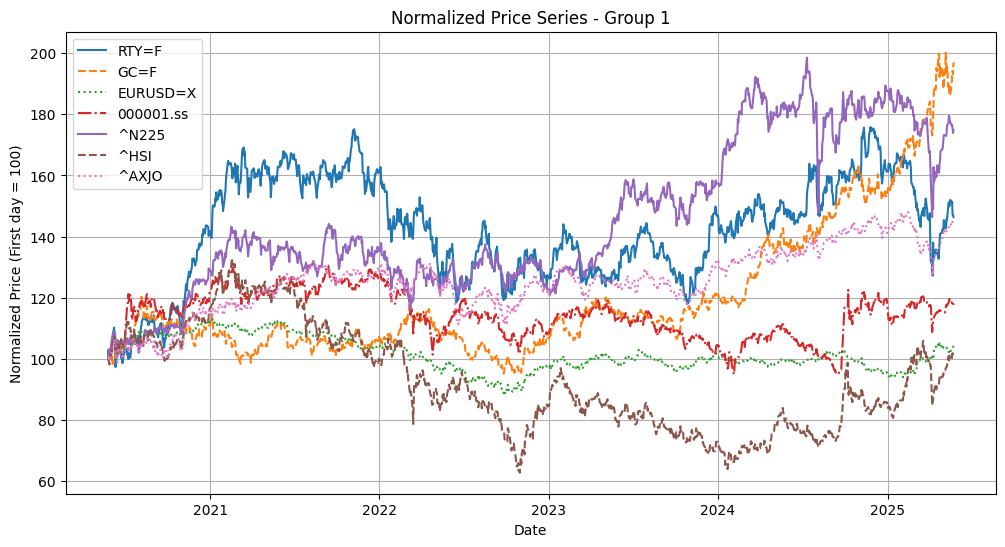

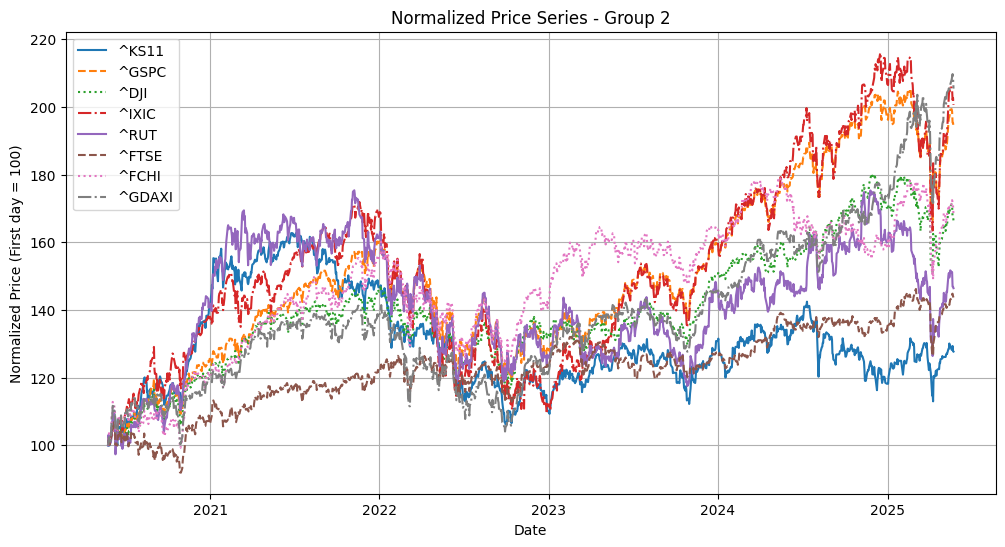

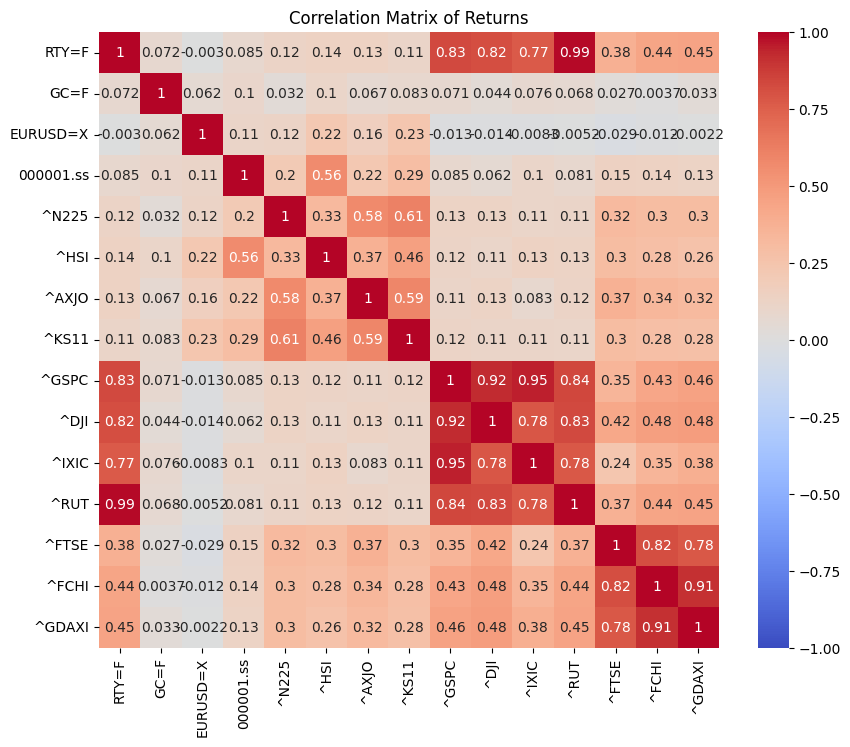


Analysis complete. Results saved to 'test_results' directory.


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import os
import sys
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import seaborn as sns
def calculate_eigenvalues_vectors(price_matrix):
    """
    Calculate eigenvalues and eigenvectors of the price correlation matrix
    
    Parameters:
    -----------
    price_matrix : pandas.DataFrame
        Matrix of closing prices for all tickers
        
    Returns:
    --------
    eigenvalues : numpy.ndarray
        Array of eigenvalues
    eigenvectors : numpy.ndarray
        Matrix of eigenvectors
    """
    # Calculate returns correlation matrix
    returns = price_matrix.pct_change().dropna()
    corr_matrix = returns.corr()
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(corr_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    return eigenvalues, eigenvectors

def plot_eigenvalue_distribution(eigenvalues, tickers):
    """
    Plot the distribution of eigenvalues
    
    Parameters:
    -----------
    eigenvalues : numpy.ndarray
        Array of eigenvalues
    tickers : list
        List of ticker symbols
    """
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
    plt.title('Eigenvalue Distribution')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.grid(True)
    plt.show()
    
    # Print explained variance ratios
    explained_var_ratio = eigenvalues / np.sum(eigenvalues)
    cumulative_var_ratio = np.cumsum(explained_var_ratio)
    
    print("\nExplained Variance Ratios:")
    for i, (var, cum_var) in enumerate(zip(explained_var_ratio, cumulative_var_ratio)):
        print(f"PC{i+1}: {var:.4f} (Cumulative: {cum_var:.4f})")

# Add parent directory to path to import modules
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))

def download_ticker_data(tickers, start_date, end_date):
    """
    Download data for multiple tickers
    """
    ticker_data = {}
    
    for ticker in tickers:
        try:
            data = yf.download(ticker, 
                              start=start_date.strftime('%Y-%m-%d'),
                              end=end_date.strftime('%Y-%m-%d'))
            if not data.empty:
                ticker_data[ticker] = data
                print(f"Successfully downloaded data for {ticker}")
            else:
                print(f"No data available for {ticker}")
        except Exception as e:
            print(f"Error downloading {ticker}: {str(e)}")
    
    return ticker_data

def prepare_price_matrix(ticker_data):
    """
    Prepare a matrix of closing prices for all tickers
    """
    # Get all dates from all dataframes
    all_dates = set()
    for ticker, data in ticker_data.items():
        all_dates.update(data.index)
    
    all_dates = sorted(all_dates)
    
    # Create a dataframe with all dates
    price_matrix = pd.DataFrame(index=all_dates)
    
    # Add closing prices for each ticker
    for ticker, data in ticker_data.items():
        price_matrix[ticker] = data['Close']
    
    # Forward fill missing values (use previous day's price)
    price_matrix = price_matrix.fillna(method='ffill')
    
    # Drop rows with any remaining NaN values
    price_matrix = price_matrix.dropna()
    
    return price_matrix

def johansen_test(price_matrix, det_order=1, k_ar_diff=1):
    """
    Perform Johansen cointegration test
    
    Parameters:
    -----------
    price_matrix : pandas.DataFrame
        Matrix of closing prices for all tickers
    det_order : int
        Deterministic term inclusion
        0: no deterministic terms
        1: constant term
        2: constant and linear trend
    k_ar_diff : int
        Number of lagged differences in the model
    
    Returns:
    --------
    result : statsmodels.tsa.vector_ar.vecm.JohansenTestResult
        Johansen test result
    """
    # Take log of prices to stabilize variance
    log_prices = np.log(price_matrix)
    
    # Perform Johansen test
    result = coint_johansen(log_prices, det_order=det_order, k_ar_diff=k_ar_diff)
    
    return result

def interpret_johansen_results(result, tickers, significance_level=0.05):
    """
    Interpret Johansen test results
    
    Parameters:
    -----------
    result : statsmodels.tsa.vector_ar.vecm.JohansenTestResult
        Johansen test result
    tickers : list
        List of ticker symbols
    significance_level : float
        Significance level for hypothesis testing
    
    Returns:
    --------
    interpretation : dict
        Dictionary with interpretation of results
    """
    # Critical values for trace test
    trace_crit_vals = result.cvt
    # Trace statistics
    trace_stats = result.lr1
    
    # Critical values for max eigenvalue test
    max_eig_crit_vals = result.cvm
    # Max eigenvalue statistics
    max_eig_stats = result.lr2
    
    # Number of variables
    n = len(tickers)
    
    # Determine cointegration rank using trace test
    trace_rank = 0
    for i in range(n):
        if trace_stats[i] > trace_crit_vals[i, 0]:  # 0 index is for 90% significance
            trace_rank = i + 1
    
    # Determine cointegration rank using max eigenvalue test
    max_eig_rank = 0
    for i in range(n):
        if max_eig_stats[i] > max_eig_crit_vals[i, 0]:  # 0 index is for 90% significance
            max_eig_rank = i + 1
    
    # Get eigenvectors (cointegrating vectors)
    eigenvectors = result.evec
    
    # Create interpretation dictionary
    interpretation = {
        'trace_rank': trace_rank,
        'max_eig_rank': max_eig_rank,
        'trace_stats': trace_stats,
        'trace_crit_vals': trace_crit_vals,
        'max_eig_stats': max_eig_stats,
        'max_eig_crit_vals': max_eig_crit_vals,
        'eigenvectors': eigenvectors
    }
    
    return interpretation
def plot_cointegration_results(price_matrix, interpretation, tickers):
    """
    Plot cointegration results
    """
    # Create directory for results
    os.makedirs('test_results', exist_ok=True)
    
    # Define line styles for different tickers
    line_styles = ['-', '--', ':', '-.'] * (len(tickers) // 4 + 1)
    
    # Split tickers into two groups
    mid_point = len(tickers) // 2
    first_group = tickers[:mid_point]
    second_group = tickers[mid_point:]
    
    # Plot first group
    plt.figure(figsize=(12, 6))
    for ticker, style in zip(first_group, line_styles[:mid_point]):
        plt.plot(price_matrix.index, price_matrix[ticker] / price_matrix[ticker].iloc[0] * 100, 
                label=ticker, linestyle=style)
    plt.title('Normalized Price Series - Group 1')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (First day = 100)')
    plt.legend()
    plt.grid(True)
    plt.savefig('test_results/price_series_group1.png')
    plt.show()
    
    # Plot second group
    plt.figure(figsize=(12, 6))
    for ticker, style in zip(second_group, line_styles):
        plt.plot(price_matrix.index, price_matrix[ticker] / price_matrix[ticker].iloc[0] * 100, 
                label=ticker, linestyle=style)
    plt.title('Normalized Price Series - Group 2')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (First day = 100)')
    plt.legend()
    plt.grid(True)
    plt.savefig('test_results/price_series_group2.png')
    plt.show()

    
    # Plot cointegration vectors if any cointegration relationship exists
    if interpretation['trace_rank'] > 0:
        # Get first cointegrating vector
        coint_vector = interpretation['eigenvectors'][:, 0]
        
        # Create cointegrated series
        coint_series = np.zeros(len(price_matrix))
        log_prices = np.log(price_matrix)
        
        for i in range(len(tickers)):
            coint_series += coint_vector[i] * log_prices.iloc[:, i].values
        
        # Plot cointegrated series
        plt.figure(figsize=(12, 6))
        plt.plot(price_matrix.index, coint_series)
        plt.title('First Cointegrated Series')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.grid(True)
        plt.show()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    corr_matrix = price_matrix.pct_change().dropna().corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Returns')
    plt.show()

def main():
    """
    Main function to run Johansen cointegration test
    """
    # Define tickers to test
    # tickers = ['RTY=F', '^IXIC', 'BTC-USD', 'GC=F', 'EURUSD=X']
    tickers = ['RTY=F', 'GC=F', 'EURUSD=X', '000001.ss', '^N225', '^HSI', '^AXJO', '^KS11', '^GSPC','^DJI', '^IXIC', '^RUT', '^FTSE', '^FCHI', '^GDAXI']
    # tickers = ['^IXIC',  'GC=F']
    
    # Define test period
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365*5)  # 3 years of data
    
    # Download data
    print("Downloading ticker data...")
    ticker_data = download_ticker_data(tickers, start_date, end_date)
    
    # Prepare price matrix
    print("Preparing price matrix...")
    price_matrix = prepare_price_matrix(ticker_data)
    
    # Check if we have enough data
    if len(price_matrix) < 100:
        print("Not enough data for cointegration test. Need at least 100 observations.")
        return
    
    # Print data summary
    print("\nData Summary:")
    print(f"Period: {price_matrix.index[0]} to {price_matrix.index[-1]}")
    print(f"Number of observations: {len(price_matrix)}")
    print("\nFirst few rows:")
    print(price_matrix.head())
    
    # Perform Johansen test
    print("\nPerforming Johansen cointegration test...")
    result = johansen_test(price_matrix)
    
    # Interpret results
    print("\nInterpreting results...")
    interpretation = interpret_johansen_results(result, tickers)
    
    # Print results
    print("\nJohansen Cointegration Test Results:")
    print(f"Trace test cointegration rank: {interpretation['trace_rank']}")
    print(f"Max eigenvalue test cointegration rank: {interpretation['max_eig_rank']}")
    
    print("\nTrace Statistics:")
    for i, stat in enumerate(interpretation['trace_stats']):
        print(f"H0: r <= {i}, H1: r > {i}: {stat:.4f}, Critical Value (95%): {interpretation['trace_crit_vals'][i, 1]:.4f}")
    
    print("\nMax Eigenvalue Statistics:")
    for i, stat in enumerate(interpretation['max_eig_stats']):
        print(f"H0: r = {i}, H1: r = {i+1}: {stat:.4f}, Critical Value (95%): {interpretation['max_eig_crit_vals'][i, 1]:.4f}")
    
    # If cointegration exists, print cointegrating vectors
    if interpretation['trace_rank'] > 0:
        print("\nCointegrating vectors (normalized):")
        for i in range(interpretation['trace_rank']):
            vector = interpretation['eigenvectors'][:, i]
            vector_str = ", ".join([f"{tickers[j]}: {vector[j]:.4f}" for j in range(len(tickers))])
            print(f"Vector {i+1}: {vector_str}")
        
        # Print trading implications
        print("\nTrading Implications:")
        print("The assets appear to be cointegrated, suggesting potential for statistical arbitrage strategies.")
        print("Consider pairs trading or basket trading approaches using the cointegrating vectors as weights.")
    else:
        print("\nTrading Implications:")
        print("No significant cointegration found among these assets.")
        print("These assets may be suitable for diversification but not for statistical arbitrage strategies.")
    
    # Plot results
    print("\nPlotting results...")
    plot_cointegration_results(price_matrix, interpretation, tickers)
    
    print("\nAnalysis complete. Results saved to 'test_results' directory.")

main()